           ** 📈 Stock Market Data Analytics Project (Pandas & Matplotlib)**
**Role**:Data Science Student

**Objective**: Analyze stock market dataset using Python to discover price trends, volume patterns, and top performing stocks.

**Tools Used**: Python, Pandas, Matplotlib

**Environment**: Google Colab / Jupyter Notebook

**1. Import Required Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True


**2. Load SuperStore Dataset (CSV)**

In [ ]:
from google.colab import files
uploaded = files.upload()

file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

df.head()


Saving stock_market_dataset_2026.csv to stock_market_dataset_2026 (1).csv


,Date,Open,High,Low,Close,Volume,moving avg
0,01-01-2026,260.135504,345.080201,297.957297,246.015251,66601.38952,246.015251
1,02-01-2026,174.239100,181.529956,177.389677,162.376706,62818.28966,204.195978
2,03-01-2026,193.111293,231.988991,164.696850,212.463279,53335.27294,187.419992
3,04-01-2026,231.983928,233.963611,244.060685,266.953880,21967.53574,239.708580
4,05-01-2026,241.354433,288.510937,274.551509,236.758244,25993.24543,251.856062


**3. Dataset Overview**

In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        60 non-null     object 
 1   Open        60 non-null     float64
 2   High        60 non-null     float64
 3   Low         60 non-null     float64
 4   Close       60 non-null     float64
 5   Volume      60 non-null     float64
 6   moving avg  60 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


,Date,Open,High,Low,Close,Volume,moving avg
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
unique,60,NaN,NaN,NaN,NaN,NaN,NaN
top,01-01-2026,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,317.578476,324.834371,310.062452,321.413908,96857.266880,322.203766
std,NaN,124.894460,113.810912,114.757465,117.936883,57275.224317,88.630407
min,NaN,90.187967,125.212580,108.065202,111.459670,11694.276850,128.566502
25%,NaN,231.444019,243.979037,209.209088,228.520299,49928.173413,254.807842
50%,NaN,302.895400,319.400777,296.008377,312.412122,94178.917305,326.513757
75%,NaN,400.764422,411.877158,390.189114,398.542781,144141.756825,382.081009


**4. Data Cleaning**

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Remove missing values
df = df.dropna()

df.shape


(60, 7)

**5. Average Closing Price Analysis**

In [ ]:
price_column = [col for col in df.columns if 'close' in col.lower()][0]

avg_price = df[price_column].mean()
print("Average Closing Price:", avg_price)


Average Closing Price: 321.41390760499996


**6. Stock Volume by Company (Bar Chart)**

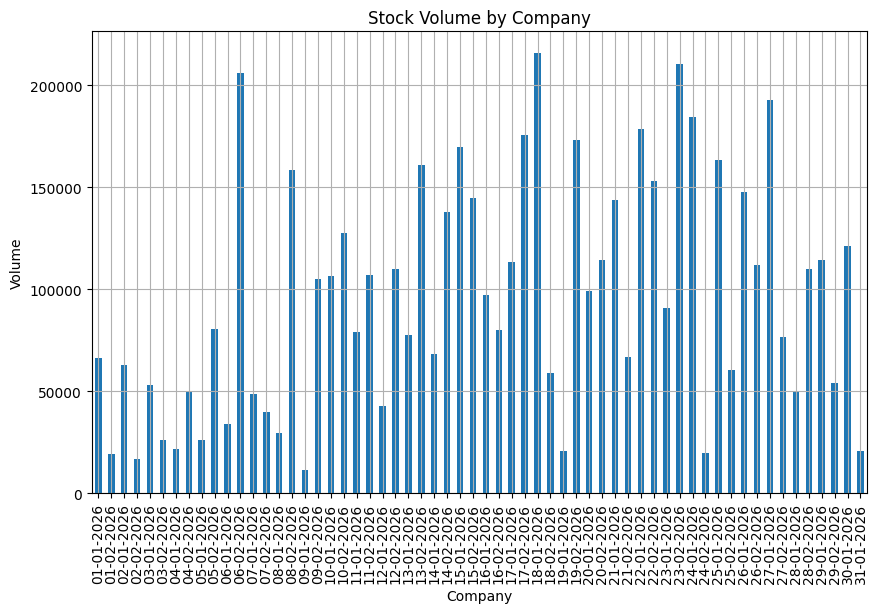

In [ ]:
company_column = df.select_dtypes(include='object').columns[0]
volume_column = [col for col in df.columns if 'volume' in col.lower()][0]

volume_by_company = df.groupby(company_column)[volume_column].sum()
volume_by_company

volume_by_company.plot(kind='bar')
plt.title("Stock Volume by Company")
plt.xlabel("Company")
plt.ylabel("Volume")
plt.show()



**7. Price Trend Over Time (Line Chart)**

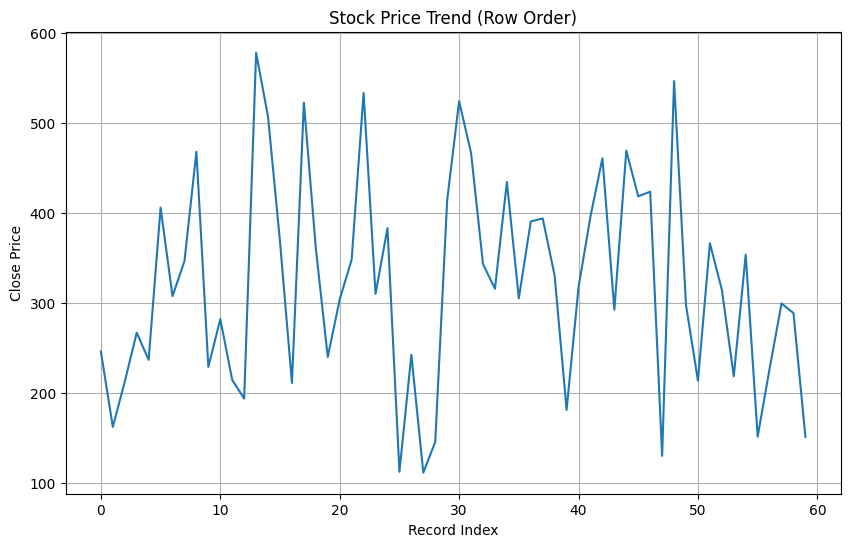

In [ ]:
price_column = [col for col in df.columns if 'close' in col.lower()][0]

plt.plot(df[price_column].values)
plt.title("Stock Price Trend (Row Order)")
plt.xlabel("Record Index")
plt.ylabel("Close Price")
plt.show()





**8. Top Performing Stocks**

In [ ]:
top_stocks = df.sort_values(by=price_column, ascending=False).head(10)
top_stocks


,Date,Open,High,Low,Close,Volume,moving avg
13,14-01-2026,508.634646,537.726708,531.201680,577.863244,68135.02281,385.789620
48,18-02-2026,522.337528,459.192754,472.610118,546.363116,59161.77622,338.314752
22,23-01-2026,559.841260,397.328999,546.984188,533.278896,90952.36717,440.670498
30,31-01-2026,497.249121,404.424822,427.702455,523.991417,20641.53137,469.087955
17,18-01-2026,459.027492,502.449624,438.163513,522.488446,215691.01570,366.817684
14,15-01-2026,498.845197,492.132512,492.858789,506.570448,169719.47600,542.216846
44,14-02-2026,391.175347,502.460542,426.615880,469.127345,137819.72410,380.844805
8,09-01-2026,423.912988,411.151792,345.489730,467.993781,11694.27685,407.227551
31,01-02-2026,375.981802,373.515315,445.671526,466.467277,19530.21228,495.229347
42,12-02-2026,382.731545,488.164069,465.981279,460.713607,109829.78490,428.408642


**9. Price Contribution Percentage**

In [ ]:
contribution = (df[price_column] / df[price_column].sum()) * 100
contribution.head()


,Close
0,1.275693
1,0.841992
2,1.101712
3,1.384268
4,1.227691
